In [80]:
import os
import zipfile

def import_data():
    os.mkdir("Data")
    !kaggle competitions download -c tabular-playground-series-sep-2022 -p Data/
    with zipfile.ZipFile("Data/tabular-playground-series-sep-2022.zip", "r") as zipdata:
        zipdata.extractall("Data/")

In [81]:
#import_data()

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
train = pd.read_csv("Data/train.csv", index_col="row_id")
train.head()

,date,country,store,product,num_sold
row_id,,,,,
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


<AxesSubplot:xlabel='num_sold', ylabel='Density'>

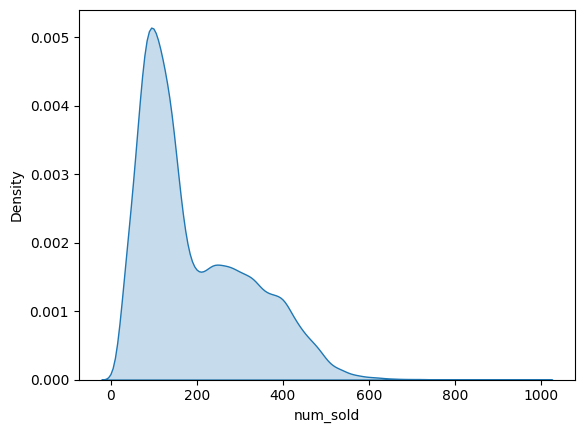

In [84]:
sns.kdeplot(data = train, x="num_sold", fill=True)

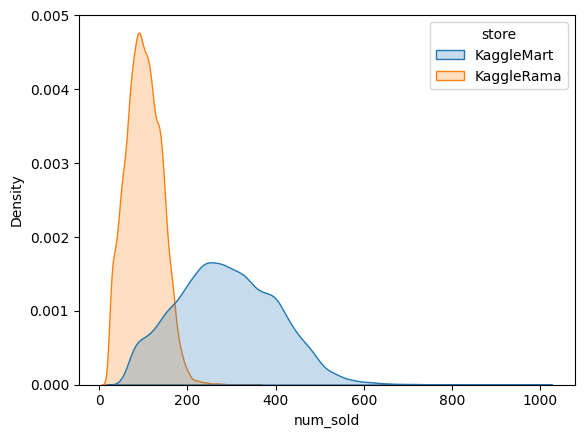

In [85]:
sns.kdeplot(data = train, x="num_sold", fill=True, hue="store");

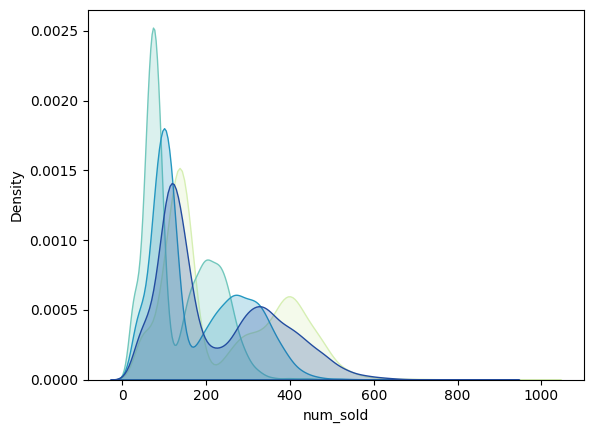

In [86]:
sns.kdeplot(data=train, x="num_sold", hue="product", fill=True, palette="YlGnBu_r", legend=False);

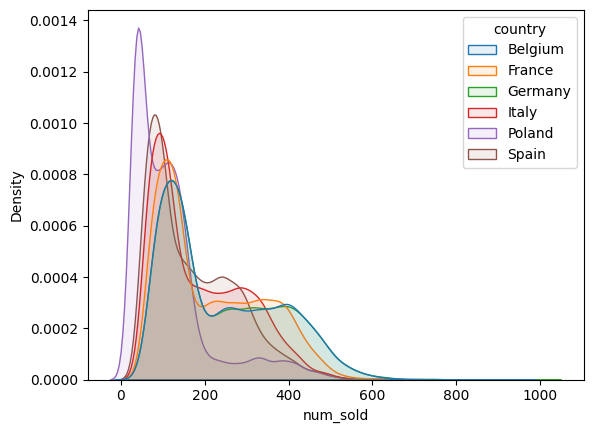

In [87]:
sns.kdeplot(data=train, x="num_sold", hue="country", fill=True, alpha=0.1);

In [88]:
train["date"] = pd.to_datetime(train["date"])

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70128 entries, 0 to 70127
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      70128 non-null  datetime64[ns]
 1   country   70128 non-null  object        
 2   store     70128 non-null  object        
 3   product   70128 non-null  object        
 4   num_sold  70128 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 3.2+ MB


In [90]:
train["month"] = train["date"].dt.month

In [91]:
train["day"] = train["date"].dt.day

In [92]:
train = train.drop(["date"], axis=1)

In [79]:
train["product"].value_counts()

Kaggle Advanced Techniques          17532
Kaggle Getting Started              17532
Kaggle Recipe Book                  17532
Kaggle for Kids: One Smart Goose    17532
Name: product, dtype: int64

In [93]:
cols = ["month", 'day', "country", "store", "product"]
x = train[cols]
y = train["num_sold"]

In [94]:
from sklearn.model_selection import train_test_split
xtrain, xvalid, ytrain, yvalid = train_test_split(x, y, test_size=0.25, random_state=123)

In [38]:
xtrain

,month,country,store,product,f1,f2
row_id,,,,,,
57803,4,France,KaggleMart,Kaggle for Kids: One Smart Goose,4France,KaggleMartKaggle for Kids: One Smart Goose
53979,1,Italy,KaggleMart,Kaggle for Kids: One Smart Goose,1Italy,KaggleMartKaggle for Kids: One Smart Goose
40116,4,Poland,KaggleRama,Kaggle Advanced Techniques,4Poland,KaggleRamaKaggle Advanced Techniques
1338,1,Spain,KaggleMart,Kaggle Recipe Book,1Spain,KaggleMartKaggle Recipe Book
35171,1,Poland,KaggleMart,Kaggle for Kids: One Smart Goose,1Poland,KaggleMartKaggle for Kids: One Smart Goose
...,...,...,...,...,...,...
63206,8,Poland,KaggleRama,Kaggle Recipe Book,8Poland,KaggleRamaKaggle Recipe Book
61404,7,France,KaggleRama,Kaggle Advanced Techniques,7France,KaggleRamaKaggle Advanced Techniques
17730,1,Germany,KaggleMart,Kaggle Recipe Book,1Germany,KaggleMartKaggle Recipe Book


In [95]:
xtrain.head()

,month,day,country,store,product
row_id,,,,,
57803,4,19,France,KaggleMart,Kaggle for Kids: One Smart Goose
53979,1,30,Italy,KaggleMart,Kaggle for Kids: One Smart Goose
40116,4,16,Poland,KaggleRama,Kaggle Advanced Techniques
1338,1,28,Spain,KaggleMart,Kaggle Recipe Book
35171,1,3,Poland,KaggleMart,Kaggle for Kids: One Smart Goose


In [96]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
xtrain = ohe.fit_transform(xtrain)
xvalid = ohe.transform(xvalid)

In [97]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [98]:
ypred = dtr.predict(xvalid)

In [99]:
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(yvalid, ypred))
print(np.sqrt(mean_squared_error(yvalid, ypred)))

0.7967153847031025
57.276905917280644


In [45]:
test = pd.read_csv("Data/test.csv", index_col="row_id")

In [46]:
test["date"] = pd.to_datetime(test["date"])
test["month"] = test["date"].dt.month
test["day"] = test["date"].dt.day

In [49]:
cols = ["month", "country", "store", "product"]
xtest = test[cols]

In [50]:
xtest = ohe.transform(xtest)

In [51]:
pred = dtr.predict(xtest)

In [52]:
pred = np.ceil(pred)

In [53]:
pd.DataFrame({"row_id":test.index, "num_sold":pred}).to_csv("pred.csv", index=False)

In [54]:
test

,date,country,store,product,month,day,f1,f2
row_id,,,,,,,,
70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,1,1,1Belgium,KaggleMartKaggle Advanced Techniques
70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started,1,1,1Belgium,KaggleMartKaggle Getting Started
70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book,1,1,1Belgium,KaggleMartKaggle Recipe Book
70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,1,1,1Belgium,KaggleMartKaggle for Kids: One Smart Goose
70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,1,1,1Belgium,KaggleRamaKaggle Advanced Techniques
...,...,...,...,...,...,...,...,...
87643,2021-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,12,31,12Spain,KaggleMartKaggle for Kids: One Smart Goose
87644,2021-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,12,31,12Spain,KaggleRamaKaggle Advanced Techniques
87645,2021-12-31,Spain,KaggleRama,Kaggle Getting Started,12,31,12Spain,KaggleRamaKaggle Getting Started


In [55]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor(n_estimators=300, n_jobs=-1)
rfg.fit(xtrain, ytrain)
ypred = rfg.predict(xvalid)
r2_score(yvalid, ypred)

0.871095527223927

In [56]:
np.sqrt(mean_squared_error(yvalid, ypred))

45.61012755673221

In [195]:
pred = rfg.predict(xtest)
pred = np.ceil(pred)
pd.DataFrame({"row_id":test.index, "num_sold":pred}).to_csv("pred.csv", index=False)

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=300)
gbr.fit(xtrain,ytrain)
ypred = gbr.predict(xvalid)
r2_score(yvalid, ypred)

0.8655649471942095

In [200]:
sns.

NameError: name 'data' is not defined